# K-Mean in python

# Data cleaning

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
Record=pd.read_csv('/Users/atousa/Desktop/sheridan/Python-Data-Science-and-Machine-Learning-Bootcamp 2/College_Data.csv',sep=',',index_col=0)

In [41]:
Record.head(n=5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [42]:
Record.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [43]:
Record.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [44]:
Record1=Record[['Outstate','F.Undergrad','Grad.Rate','Private']]

# Data Visulalization

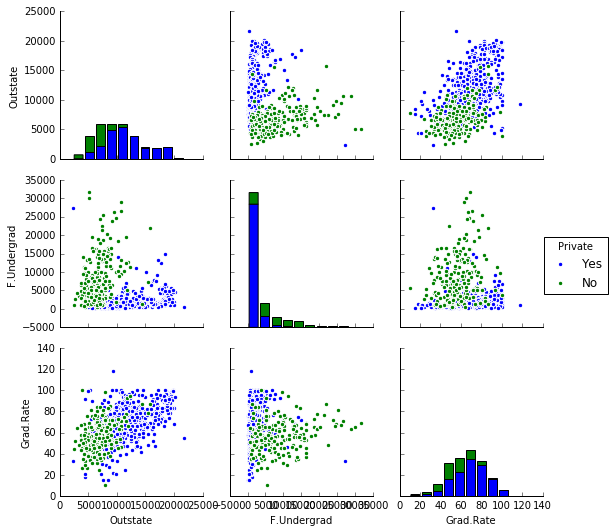

In [45]:
sns.pairplot(Record1,hue='Private');

# K-Mean Algorithm

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmean=KMeans(n_clusters=3)

In [70]:
kmean.fit(Record.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
centroids=kmean.cluster_centers_

In [72]:
labels = kmean.labels_

In [53]:
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
c = Counter(labels)

In [54]:
Record_array=Record1.drop('Private',axis=1).as_matrix(columns=None)

In [76]:
def feature_trans(x):
    if x=='Yes': return(0) 
    if x=='No': return(1)
        

In [77]:
Record['Result']=Record['Private'].apply(feature_trans)

In [ ]:
colors = ["g","r","b"]

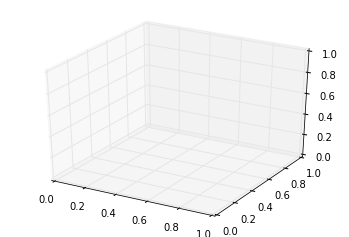

In [56]:
ax = plt.gca(projection='3d')

In [57]:
for i in range(len(Record_array)):
    print("coordinate:",Record_array[i], "label:", labels[i])
    print "i : ",i
    print "color[labels[i]] : ",color[labels[i]]
    ax.scatter(Record_array[i][0], Record_array[i][1],Record_array[i][2], c=color[labels[i]])


('coordinate:', array([7440, 2885,   60]), 'label:', 2)
i :  0
color[labels[i]] :  0.681037966173
('coordinate:', array([12280,  2683,    56]), 'label:', 0)
i :  1
color[labels[i]] :  0.151333295764
('coordinate:', array([11250,  1036,    54]), 'label:', 2)
i :  2
color[labels[i]] :  0.681037966173
('coordinate:', array([12960,   510,    59]), 'label:', 0)
i :  3
color[labels[i]] :  0.151333295764
('coordinate:', array([7560,  249,   15]), 'label:', 2)
i :  4
color[labels[i]] :  0.681037966173
('coordinate:', array([13500,   678,    55]), 'label:', 0)
i :  5
color[labels[i]] :  0.151333295764
('coordinate:', array([13290,   416,    63]), 'label:', 0)
i :  6
color[labels[i]] :  0.151333295764
('coordinate:', array([13868,  1594,    73]), 'label:', 0)
i :  7
color[labels[i]] :  0.151333295764
('coordinate:', array([15595,   973,    80]), 'label:', 0)
i :  8
color[labels[i]] :  0.151333295764
('coordinate:', array([10468,   799,    52]), 'label:', 2)
i :  9
color[labels[i]] :  0.681037966

('coordinate:', array([16624,  1662,    47]), 'label:', 0)
i :  107
color[labels[i]] :  0.151333295764
('coordinate:', array([13500,   471,    52]), 'label:', 0)
i :  108
color[labels[i]] :  0.151333295764
('coordinate:', array([10335,   518,    73]), 'label:', 2)
i :  109
color[labels[i]] :  0.681037966173
('coordinate:', array([8730,  139,   58]), 'label:', 2)
i :  110
color[labels[i]] :  0.681037966173
('coordinate:', array([9300, 1068,   63]), 'label:', 2)
i :  111
color[labels[i]] :  0.681037966173
('coordinate:', array([7860, 2910,   48]), 'label:', 2)
i :  112
color[labels[i]] :  0.681037966173
('coordinate:', array([4412,  959,   21]), 'label:', 2)
i :  113
color[labels[i]] :  0.681037966173
('coordinate:', array([17000,   887,    87]), 'label:', 0)
i :  114
color[labels[i]] :  0.151333295764
('coordinate:', array([17500,  1928,    79]), 'label:', 0)
i :  115
color[labels[i]] :  0.151333295764
('coordinate:', array([10740,   604,    74]), 'label:', 2)
i :  116
color[labels[i]] 

i :  216
color[labels[i]] :  0.681037966173
('coordinate:', array([12500,  1271,    52]), 'label:', 0)
i :  217
color[labels[i]] :  0.151333295764
('coordinate:', array([10800,  9528,    46]), 'label:', 1)
i :  218
color[labels[i]] :  0.241566811972
('coordinate:', array([17450,  5471,    72]), 'label:', 0)
i :  219
color[labels[i]] :  0.151333295764
('coordinate:', array([8100, 1063,   55]), 'label:', 2)
i :  220
color[labels[i]] :  0.681037966173
('coordinate:', array([18300,  5881,    95]), 'label:', 0)
i :  221
color[labels[i]] :  0.151333295764
('coordinate:', array([6489, 8528,   70]), 'label:', 1)
i :  222
color[labels[i]] :  0.241566811972
('coordinate:', array([6744, 7732,   34]), 'label:', 2)
i :  223
color[labels[i]] :  0.681037966173
('coordinate:', array([9150, 1095,   76]), 'label:', 2)
i :  224
color[labels[i]] :  0.681037966173
('coordinate:', array([19964,  1944,    83]), 'label:', 0)
i :  225
color[labels[i]] :  0.151333295764
('coordinate:', array([6120,  823,   36])

color[labels[i]] :  0.681037966173
('coordinate:', array([11910,  1788,    75]), 'label:', 0)
i :  371
color[labels[i]] :  0.151333295764
('coordinate:', array([11320,  1073,    58]), 'label:', 2)
i :  372
color[labels[i]] :  0.681037966173
('coordinate:', array([11505,  1773,    67]), 'label:', 2)
i :  373
color[labels[i]] :  0.681037966173
('coordinate:', array([5580, 1695,   61]), 'label:', 2)
i :  374
color[labels[i]] :  0.681037966173
('coordinate:', array([ 9866, 10094,    53]), 'label:', 1)
i :  375
color[labels[i]] :  0.241566811972
('coordinate:', array([4386, 1673,   63]), 'label:', 2)
i :  376
color[labels[i]] :  0.681037966173
('coordinate:', array([3840, 3689,  100]), 'label:', 2)
i :  377
color[labels[i]] :  0.681037966173
('coordinate:', array([8550, 1057,   27]), 'label:', 2)
i :  378
color[labels[i]] :  0.681037966173
('coordinate:', array([13000,   671,    56]), 'label:', 0)
i :  379
color[labels[i]] :  0.151333295764
('coordinate:', array([12480,  1893,    54]), 'lab

color[labels[i]] :  0.151333295764
('coordinate:', array([6684, 8077,   62]), 'label:', 2)
i :  465
color[labels[i]] :  0.681037966173
('coordinate:', array([4449, 2745,   47]), 'label:', 2)
i :  466
color[labels[i]] :  0.681037966173
('coordinate:', array([13840,  1071,    74]), 'label:', 0)
i :  467
color[labels[i]] :  0.151333295764
('coordinate:', array([13970,   653,    68]), 'label:', 0)
i :  468
color[labels[i]] :  0.151333295764
('coordinate:', array([19960,  1199,    68]), 'label:', 0)
i :  469
color[labels[i]] :  0.151333295764
('coordinate:', array([12700,   581,    84]), 'label:', 0)
i :  470
color[labels[i]] :  0.151333295764
('coordinate:', array([17475,  4291,    70]), 'label:', 0)
i :  471
color[labels[i]] :  0.151333295764
('coordinate:', array([15200,  1345,    77]), 'label:', 0)
i :  472
color[labels[i]] :  0.151333295764
('coordinate:', array([13250,  2748,    70]), 'label:', 0)
i :  473
color[labels[i]] :  0.151333295764
('coordinate:', array([15200,   735,    64])

color[labels[i]] :  0.681037966173
('coordinate:', array([6840, 3598,   59]), 'label:', 2)
i :  572
color[labels[i]] :  0.681037966173
('coordinate:', array([6550, 2478,   46]), 'label:', 2)
i :  573
color[labels[i]] :  0.681037966173
('coordinate:', array([16130,  1442,    90]), 'label:', 0)
i :  574
color[labels[i]] :  0.151333295764
('coordinate:', array([14500,   527,    61]), 'label:', 0)
i :  575
color[labels[i]] :  0.151333295764
('coordinate:', array([15150, 10142,    67]), 'label:', 0)
i :  576
color[labels[i]] :  0.151333295764
('coordinate:', array([7850,  396,   53]), 'label:', 2)
i :  577
color[labels[i]] :  0.681037966173
('coordinate:', array([5666,  908,   46]), 'label:', 2)
i :  578
color[labels[i]] :  0.681037966173
('coordinate:', array([10965,  1757,    98]), 'label:', 2)
i :  579
color[labels[i]] :  0.681037966173
('coordinate:', array([7070,  402,   36]), 'label:', 2)
i :  580
color[labels[i]] :  0.681037966173
('coordinate:', array([ 5130, 31643,    69]), 'label:

In [58]:
for cluster_number in range(0,3):
  print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

Cluster 0 contains 261 samples
Cluster 1 contains 96 samples
Cluster 2 contains 420 samples


In [59]:
ax.scatter(centroids[:, 0],centroids[:, 1],centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 100, c=color)

# Validation

In [60]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
print(confusion_matrix(Record['Result'],labels))

[[430   7 128]
 [135  76   1]
 [  0   0   0]]


In [79]:
print(classification_report(Record['Result'],labels))

             precision    recall  f1-score   support

          0       0.76      0.76      0.76       565
          1       0.92      0.36      0.52       212
          2       0.00      0.00      0.00         0

avg / total       0.80      0.65      0.69       777

